# Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
%%bash
pip install seaborn

In [4]:
import seaborn as sns

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Extracting data

In [7]:
data='http://bit.ly/w-data'
df=pd.read_csv(data)

# Data Exploration

In [8]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.shape

(25, 2)

# EDA

Text(0.5, 1.0, 'Hours vs Percentage Scored')

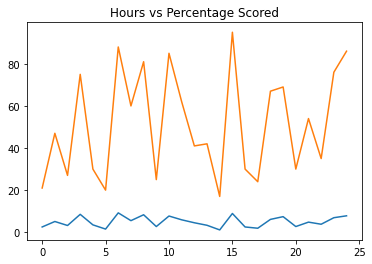

In [11]:
plt.plot(df)
plt.title("Hours vs Percentage Scored")


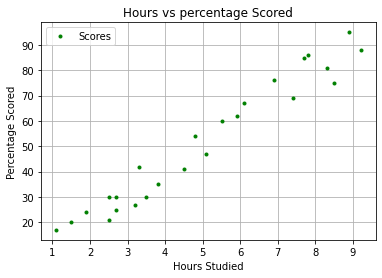

In [14]:
df.plot(x = 'Hours',y = 'Scores', style='.' , color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs percentage Scored')
plt.grid()

In [18]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values


# Model Building

In [19]:
from sklearn.model_selection import train_test_split #to split this data into training and test sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
l_reg=LinearRegression()
l_reg.fit(x_train,y_train)

LinearRegression()

In [22]:
m = l_reg.coef_
c = l_reg.intercept_

Text(0, 0.5, 'Percentage scored')

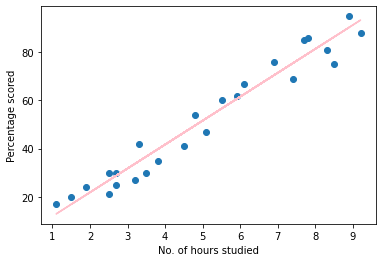

In [23]:
predicted_line = (m*x) + c
plt.scatter(x,y)
plt.plot(x, predicted_line, c='pink');
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")

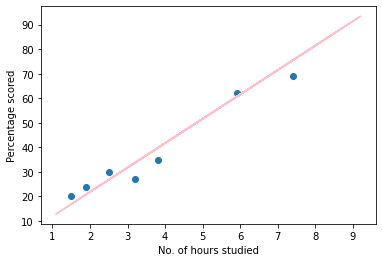

In [25]:
predicted_line = (m*x) + c
plt.scatter(x_test,y_test)
plt.plot(x, predicted_line, c='pink');
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")
plt.show()

# Prediction

In [31]:
y_predict=l_reg.predict(x_test)
y_predict

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [32]:
from sklearn import metrics
acc=metrics.r2_score(y_test,y_predict)
print("Accuracy Score of Model: ",round(acc*100,2),'%')


Accuracy Score of Model:  93.68 %


# Required solution

In [26]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
new_pred = l_reg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652


# Predicting function

In [30]:
def scorepredict():
    """This function predicts the percentage scored by a student based on the hours studied."""
    x=float(input('Enter hours studied to predict scores: '))
    hours = x
    test = np.array([hours])
    test = test.reshape(-1, 1)
    new_pred = l_reg.predict(test)
    print('\n')
    print("No of Hours = {}".format(hours))
    print("Score Predicted = {}".format(round(new_pred[0]),2))
scorepredict()    

Enter hours studied to predict scores: 8


No of Hours = 8.0
Score Predicted = 81
